# Phase 1 : Live-code 3  

### Name : Alexander G.T
### Class : FTDS - 014

## Objective

Make an unsupervised machine learning from life expectancy dataset

##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import chardet
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

## Load Dataset 

In [2]:
# define the data
file = 'Life_expectancy_dataset.csv'

In [3]:
# reading the dataset
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

Note: already done data cleaning in excel 

In [4]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [5]:
# Renaming the columns
dict = {'Rank': 'Rank',
        'Country': 'Country',
        'Overall Life': 'Overall_life',
        'Male Life': 'Male_life',
        'Female Life': 'Female_life'}

df.rename(columns=dict,
          inplace=True)

## Insight
1. Monaco is the best country in terms of life expectancy
2. from the top five country with highest life expectancy, 3 of them are asian countries
3. surprisingly the female life expectancy in monaco is over 90 years old

## EDA

In [6]:
continent = df.groupby(by = 'Continent').mean().sort_values(by = 'Overall_life', ascending = False)
continent = continent.reset_index()
continent

,Continent,Rank,Overall_life,Male_life,Female_life
0,Europe,56.313725,79.019608,76.003922,82.237255
1,North America,87.147059,76.273529,73.914706,78.738235
2,South America,100.857143,75.042857,72.157143,77.992857
3,Oceania,108.400000,74.230000,71.625000,76.915000
4,Asia,112.836735,73.618367,71.046939,76.138776
5,Africa,182.400000,61.800000,60.109091,63.583636


<AxesSubplot:xlabel='Continent', ylabel='Overall_life'>

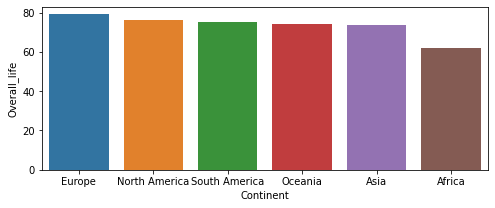

In [7]:
# making the plot of continent data to visualize better
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(data = continent, ax = ax, x = 'Continent', y = 'Overall_life')

## Insight

1. Europe has the highest overall life expectancy
2. Male life and female life expectancy is also highest in Europe
3. Africa is the worst country in terms of overall life expectancy just below Asia

In [8]:
# Function for distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], kde=True,line_kws={'linewidth': 3},color = 'k', bins = 9)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

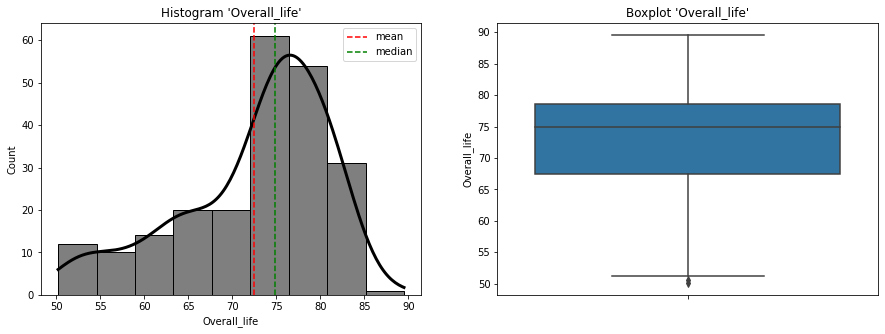

Overall_life Kurtosis: 0.052367767145502064
Overall_life Skewness: -0.896327516670228
Columns 'Overall_life' left skewed


In [9]:
plot_dist(df, 'Overall_life')

## Insight
1. Most country have the life expectancy of 70 - 75
2. there are countries with life expectancy more than 85 years old
3. The data have a little outliers for the bottom tail meaning there is a country with very low life expectancy

In [10]:
df.Male_life.mean()

70.04170403587445

In [11]:
df.Female_life.mean()

75.01928251121076

On average, female live longer than man in various country

# Data Pre-processing

## Feature Engineering - Selection

Choosing numeric data to be clustered, Kmeans and other clustering algorithm cannot cluster categorical data such as country, because calculating the euclidean distance to the categorical data is pointless

In [12]:
X = df[['Overall_life','Male_life','Female_life']]

In [13]:
# Checking for missing values
X.isnull().sum()

Overall_life    0
Male_life       0
Female_life     0
dtype: int64

## Feature Engineering - Scaling 

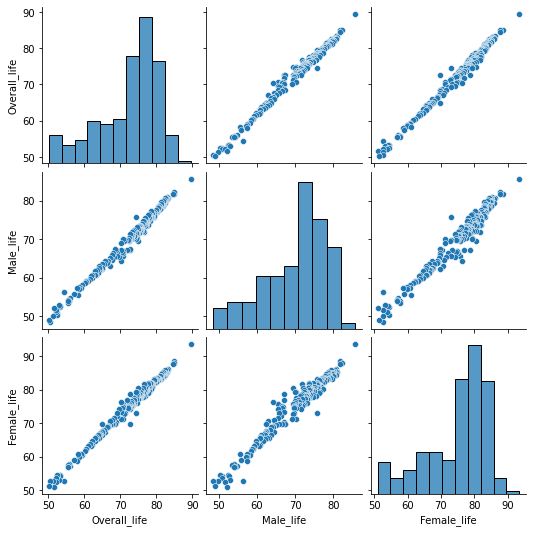

In [14]:
## Check the distribution of data
sns.pairplot(X)

Overall, the data is left skewed but it is not very extreme, the outliers is also present but the outliers is not very far deviating the median, hence I will use MinMax Scaler

In [15]:
# Define the Scaler
scaler = MinMaxScaler() #Defining which scaler to use
X_scaled = scaler.fit_transform(X) # applying the scaler

In [16]:
# Change the Scaled data into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns = ['Overall_life','Male_life','Female_life'])
X_scaled

,Overall_life,Male_life,Female_life
0,1.000000,1.000000,1.000000
1,0.885496,0.894595,0.882353
2,0.885496,0.910811,0.865882
3,0.872774,0.891892,0.861176
4,0.842239,0.867568,0.825882
...,...,...,...
218,0.048346,0.081081,0.035294
219,0.035623,0.097297,0.000000
220,0.027990,0.035135,0.040000
221,0.010178,0.000000,0.040000


## PCA

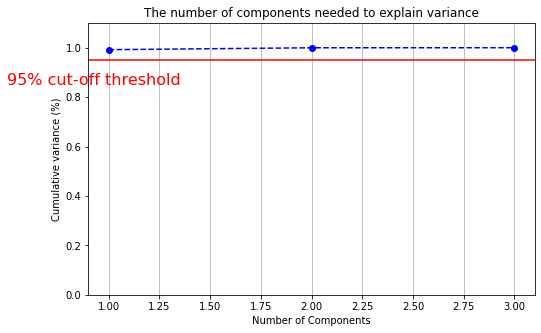

In [17]:
pca = PCA().fit(X_scaled)

fig, ax = plt.subplots(figsize=(8,5))
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

There is no need to do dimensionality reduction in this data because the 3 dimension data has already explain more than 95% of the variance

## Kmeans - Find the K

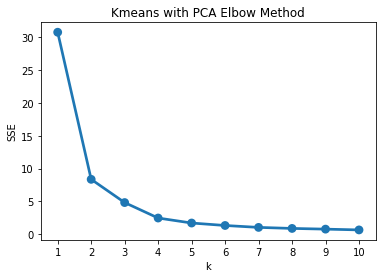

In [18]:
# Finding how many cluster is best with elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('Kmeans with PCA Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Using the elbow method, we can see that the graph has become stabilized after reaching cluster number 2, 3 and 4, there are possibilites in using k cluster of 2 3 4 or beyond, to make our analysis accurate let's do a silhouette method to confirm the number of K cluster

## Silhouette Method

In [19]:
# Preparing kmeans and silhouette scores to find which k is the best
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

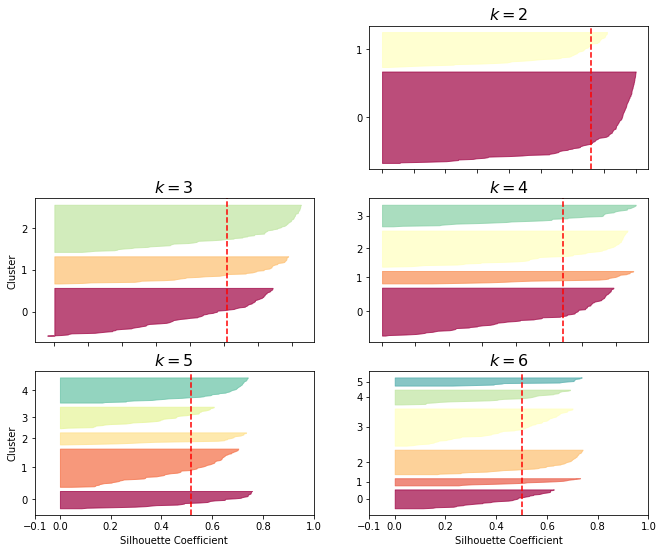

In [20]:
# Make a plot of silhouette method
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Using the silhouette method, the most consistent size between each cluster is K = 3 and 3 of the cluster pass the red dot

## Kmeans - Clustering

In [21]:
# Define the kmeans model for data
kmeans = KMeans(n_clusters=3, random_state=42, init = 'k-means++')## kmeans ++ means that the centroid will be from a data point
member = kmeans.fit_predict(X_scaled)

df['member'] = member

In [22]:
df.groupby(by = 'member').mean()

,Rank,Overall_life,Male_life,Female_life
member,,,,
0,130.0,72.794253,70.048276,75.578161
1,198.5,59.218000,57.648000,60.870000
2,43.5,79.893023,77.240698,82.680233


From the clustering without any PCA it seems that Kmeans divide the data into countries with low overall life, medium overall life and high life expectancy. It can be seen from the average rank of member 1 is lowest and member 2 is highest but average rank of countries in member 0 is in between. after doing unsupervised machine learning clustering there are 3 segment of countries. to understand it better let's visualize in 2 dimension

## Kmeans - Visualization

In [23]:
# PCA to visualize the model in 2 dimension 

pca = PCA(n_components = 2) # Define the PCA
pca.fit(X_scaled) # Fit into our features
two_dimension = pca.transform(X_scaled)

In [24]:
# Change the two dimension PCA into a dataframe for easier plotting
two_dimension = pd.DataFrame(two_dimension, columns = ['1','2'])

In [25]:
two_dimension['cluster'] = member

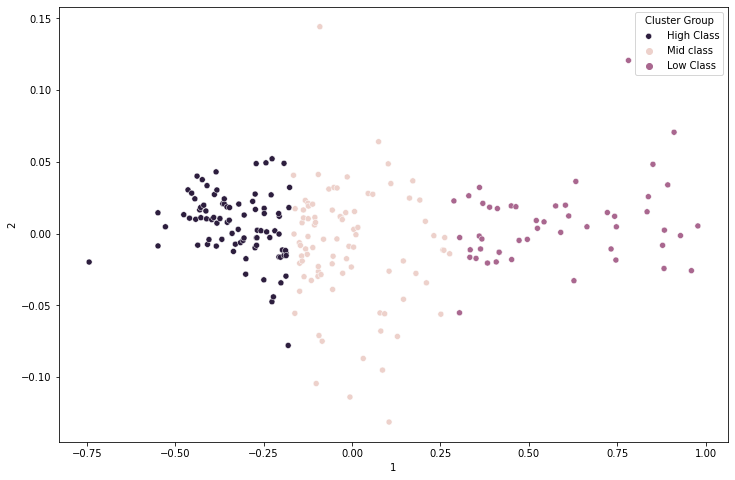

In [43]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = two_dimension, x = '1', y = '2', hue = 'cluster')
plt.legend(title='Cluster Group', loc='upper right', labels=['High Class', 'Mid class','Low Class'])

In [45]:
kmeans.inertia_

4.8091373801364945

Kmeans inertia measure how well a data is clustered, in this analysis our kmeans inertia is 4.8 which is kinda low and it is good, however inertia is not the only measure of how well a data is clustered. Another method of evaluation is to see whether the cluster is overlapping with each other or not.

## Problem

1. In the data exploration section, what interesting insights can you share?
2. How many clusters did you get from the dataset? Is it optimal? Visualize the clustering results that you get with a 2-dimensional plot where the 2 dimensions are the dimensions obtained from the dimension reduction results.
3. What are the characteristics of each cluster? Can you visualize and tell?
4. What interesting insights did you get from answer/analysis number 3?
5. Compared to EDA, are there any similarities from the clustering results you get? Tell us your analysis!

## Answers
1. Interesting thing I can share in my EDA
- Europe continent has high life expectancy and probably life quality compared to other continent
- Female averagely live longer than men
- Some countries have really low life expectancy it became the outlier

2. Cluster optimization
- Elbow method are stabilizing after cluster = 2 but it still unclear which cluster to choose
- Silhouette method with the best uniform size and highest score, although cluster = 2 has the highest score, cluster number 3 have more consistent sizes
- I already visualize the data with the optimal number of cluster

3. Characteristic of each Cluster
- Cluster 0 : Medium Average of each life expectancy
- Cluster 1 : Low average of each life expectancy
- Cluster 2 : High average of each life expectancy 

4. The interesting thing I got from question number 3
- The clustering that Kmeans make, cluster the data based on the life expectancy from low to high life expectancy

5. Analysis after Kmeans and connect with EDA

In [53]:
df.groupby(by = ['Continent','member']).agg({"Rank":'count'})

Rank
Continent     member      
Africa        0          6
              1         45
              2          4
Asia          0         31
              1          4
              2         14
Europe        0         14
              2         37
North America 0         15
              1          1
              2         18
Oceania       0         14
              2          6
South America 0          7
              2          7

Most countries in Europe are in the cluster 2, this is the same as my EDA that europe continent do have the highest life expectancy among any other continent. Countries in Africa Continent are in cluster 1 which is the lowest average life expectancy and it is also true ans ame with my EDA.